# Import thu vien

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Them du lieu tu keras

In [13]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [16]:
# xem thu du lieu
import matplotlib.pyplot as plt
from PIL import Image

<function matplotlib.pyplot.show(close=None, block=None)>

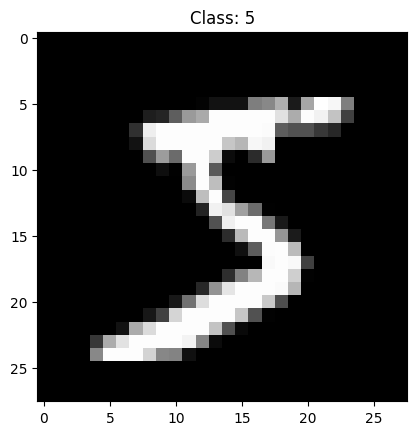

In [17]:
img = Image.fromarray(X_train[0])
plt.imshow(img, cmap="gray")
plt.title(f"Class: {y_train[0]}")
plt.show

# Bien doi du lieu

In [18]:
# 0...255 -> 0...1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train.shape, X_train.shape

((60000, 28, 28), (60000, 28, 28))

- "n" so hinh
- "w" chieu rong
- "h" chieu cao
- "d" direction (vi hinh trang den nen chon d=1, hinh co mau rgb thi d=3)

In [19]:
# them chieu direction
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

"n" so hinh (60000)
"class" so lop (ket qua gom bao nhieu loai khac nhau)

In [20]:
my_classes = 10
y_train = keras.utils.to_categorical(y_train, my_classes)
y_test = keras.utils.to_categorical(y_test, my_classes)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# Huan luyen mo hinh

In [25]:
input_shape = (28,28,1)
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(62, kernel_size=(3,3)),
     keras.layers.MaxPooling2D(pool_size=(2,2)),
     keras.layers.Flatten(),
     keras.layers.Dense(my_classes, activation="softmax"),
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 62)     │        17,918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 62)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1550)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        15,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,748 (131.83 KB)

 Trainable params: 33,748 (131.83 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# huan luyen
batch_size = 128 # so anh duoc xu li moi lan cap nhat
epochs = 5 # so lan lap cua toann bo du lieu huan luyen
validation_split = 0.1 # tach 10% tu tap train thanh validation, dam bao mo hinh khong bi overfit
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9163 - loss: 0.3014 - val_accuracy: 0.9750 - val_loss: 0.0951
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9752 - loss: 0.0846 - val_accuracy: 0.9830 - val_loss: 0.0630
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9815 - loss: 0.0616 - val_accuracy: 0.9828 - val_loss: 0.0609
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9841 - loss: 0.0516 - val_accuracy: 0.9847 - val_loss: 0.0503
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9859 - loss: 0.0445 - val_accuracy: 0.9827 - val_loss: 0.0581


# Danh gia mo hinh

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Text loss: {loss}") # ham mat mat tren tap test
print(f"Test accuracy: {accuracy}") # bao nhieu phan tram du doan dung tren tap test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9836 - loss: 0.0505
Text loss: {loss}
Test accuracy: 0.9836000204086304


# Du doan

AttributeError: AxesImage.set() got an unexpected keyword argument 'cmeo'

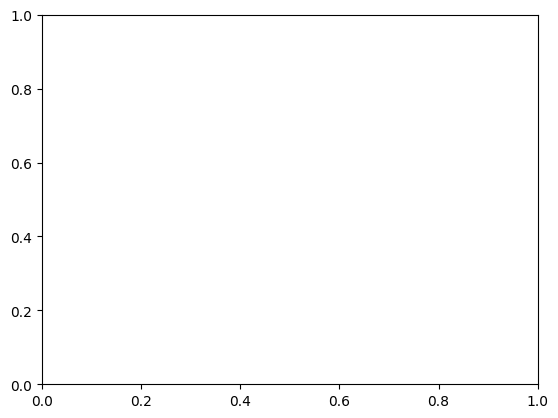

In [29]:
test_img = X_test[0]
plt.imshow(img, cmeo="grey")
plt.title(f"True class = {y_test[0]}")
plt.show()

Vì layer Dense ở cuối có 10 units nên kết quả của `predict` cũng trả về một numpy array có 10 giá trị, mỗi giá trị là tỉ lệ mà hình thuộc lớp tương ứng.
> Ví dụ: Mô hình phân loại 4 lớp có kết quả predict là `[0.1, 0.2, 0.7, 0.0]` nghĩa là hình có 10% thuộc lớp thứ nhất, 20% thuộc lớp thứ hai, 70% thuộc lớp thứ ba và 0% thuộc lớp cuối cùng.

> Lưu ý: Tổng tất cả các tỉ lệ của mảng kết quả luôn bằng 1, tương ứng với 100%.

In [30]:
test_img = np.expand_dims(test_img, 0)
preds = model.predict(test_img)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


array([[1.00770148e-09, 1.21687560e-06, 9.15641294e-07, 1.22685415e-05,
        2.11232472e-11, 4.99771224e-10, 3.22295156e-14, 9.99984264e-01,
        4.94776042e-09, 1.23940742e-06]], dtype=float32)

In [31]:
test_pred = np.argmax(preds)
print(f"Perdicted class = {test_pred}")

Perdicted class = 7
